# Generate forcing datasets for FIESTY from a 4P4Z simulation

In [1]:
import os
from glob import glob

import matplotlib.colors as colors

import numpy as np
import xarray as xr
import pop_tools 

## Spin up a dask cluster

In [2]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=1,
        memory='25GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=25GB',
        project='NCGD0011',
        walltime='01:00:00',
        interface='ib0',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [3]:
cluster, client = get_ClusterClient()
cluster.scale(12) 

/glade/work/kristenk/miniconda/envs/analysis4/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45059 instead
  http_address["port"], self.http_server.port


## Set up access to FOSI data files

In [4]:
%%time
case = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004'
droot = '/glade/scratch/kristenk/archive/' + case + '/ocn/proc/tseries/month_1'

def file_pop_h(varname):
    file_name = f'{droot}/{case}.pop.h.{varname}.000101-006112.nc'
    assert os.path.exists(file_name), f'missing {file_name}'
    return file_name

varnames = ['TEMP', 'zoo3C', 'zoo4C','zoo3_loss_zint', 'zoo4_loss_zint','diatC', 'spC', 'POC_FLUX_IN']

dsets = {}
for v in varnames:
    print(f'loading {v}')
    dsets[v] = xr.open_dataset(
            file_pop_h(v), 
            decode_coords=False, 
            decode_times=False,
            chunks={'time': 12}, #{'nlat': 32, 'nlon': 32}, # 
        ).persist()

dsets[v]

loading TEMP
loading zoo3C
loading zoo4C
loading zoo3_loss_zint
loading zoo4_loss_zint
loading diatC
loading spC
loading POC_FLUX_IN
CPU times: user 458 ms, sys: 111 ms, total: 569 ms
Wall time: 1.92 s


<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 732, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                    (time) float64 396.0 424.0 ... 2.26e+04 2.263e+04
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    ANGLE                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ANGLET                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DXU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    DYU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HT                      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HTE                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HTN                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HU                      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HUS                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HUW                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    POC_FLUX_IN             (time, z_t, nlat, nlon) float32 dask.array<chunksize=(12, 60, 384, 320), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    T0_Kelvin               float64 ...
    TAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    cp_air                  float64 ...
    cp_sw                   float64 ...
    days_in_norm_year       float64 ...
    dz                      (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    fwflux_factor           float64 ...
    grav                    float64 ...
    heat_to_PW              float64 ...
    hflux_factor            float64 ...
    latent_heat_fusion      float64 ...
    latent_heat_fusion_mks  float64 ...
    latent_heat_vapor       float64 ...
    mass_to_Sv              float64 ...
    moc_components          (moc_comp) |S384 dask.array<chunksize=(3,), meta=np.ndarray>
    momentum_factor         float64 ...
    nsurface_t              float64 ...
    nsurf

## Compute forcing datasets

Inialize outout dataset

In [5]:
%%time
USER = os.environ['USER']
dout = f'/glade/work/{USER}/fish-offline'
os.makedirs(dout, exist_ok=True)

dso = dsets[varnames[0]][['TLONG', 'TLAT', 'KMT', 'TAREA']]
dso

CPU times: user 757 µs, sys: 180 µs, total: 937 µs
Wall time: 5.74 ms


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Attributes:
    title:             g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004
    history:           Mon Mar  1 07:18:11 2021: ncks -O -4 -L 1 /glade/scrat...
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2021-02-22 at 11:06:34.8
    cell_methods:      cell_methods = time: mean ==> the variable values are ...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....

## Compute upper 100 m means

In [6]:
%%time
def field_150m_mean(da):
    """compute mean over upper 100 m; assume constant dz"""
    depth_slice = slice(0, 150e2)
    with xr.set_options(keep_attrs=True):
        if 'z_t' in da.dims:
            return da.sel(z_t=depth_slice).mean('z_t')
        elif 'z_t_150m' in da.dims:
            return da.mean('z_t_150m')

        
def field_150m_zint(da, dz):
    """compute integral over upper 100 m; assume constant dz"""
    depth_slice = slice(0, 150e2)
    with xr.set_options(keep_attrs=True):
        if 'z_t' in da.dims:            
            dao = (dz * da).sel(z_t=depth_slice).sum('z_t')
        elif 'z_t_150m' in da.dims:
            dao = (dz.isel(z_t=slice(0, 15)).rename({'z_t': 'z_t_150m'}) * da).sum('z_t_150m')
    dao.attrs['units'] = da.attrs['units'] + ' cm'        
    return dao
    
for v in ['TEMP',]:
    dso[f'{v}_150m'] = field_150m_mean(dsets[v][v]).compute()
    
    
for v in ['zoo3C', 'zoo4C', 'diatC', 'spC',]:
    dso[f'{v}_150m'] = field_150m_zint(dsets[v][v], dsets[v].dz).compute()    
    #dso[f'{v}_150m'] = dso[f'{v}_150m'].where(dsets[v][v].isel(z_t_150m=0)>-1000.)
dso.info()    

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	time = 732 ;

variables:
	float64 TLONG(nlat, nlon) ;
		TLONG:long_name = array of t-grid longitudes ;
		TLONG:units = degrees_east ;
	float64 TLAT(nlat, nlon) ;
		TLAT:long_name = array of t-grid latitudes ;
		TLAT:units = degrees_north ;
	float64 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT ;
	float64 TAREA(nlat, nlon) ;
		TAREA:long_name = area of T cells ;
		TAREA:units = centimeter^2 ;
		TAREA:coordinates = TLONG TLAT ;
	float64 time(time) ;
		time:long_name = time ;
		time:units = days since 0000-01-01 00:00:00 ;
		time:bounds = time_bound ;
		time:calendar = noleap ;
		time:cell_methods = time: mean ;
	float32 TEMP_150m(time, nlat, nlon) ;
		TEMP_150m:long_name = Potential Temperature ;
		TEMP_150m:units = degC ;
		TEMP_150m:coordinates = TLONG TLAT z_t  ;
		TEMP_150m:grid_loc = 3111 ;
		TEMP_150m:cell_methods = time: mean ;
	float32 zoo3C_150m(time, nlat, nlo

### Add  zoo loss terms that were already depth integrated to the output file

In [7]:
dso['zoo4_loss_150m'] = dsets['zoo4_loss_zint']['zoo4_loss_zint']

In [8]:
dso['zoo3_loss_150m'] = dsets['zoo3_loss_zint']['zoo3_loss_zint']

### Check output

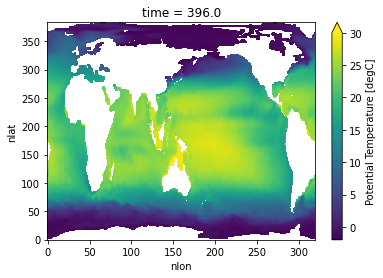

In [9]:
dso.TEMP_150m.isel(time=0).plot(vmin=-2, vmax=30.);

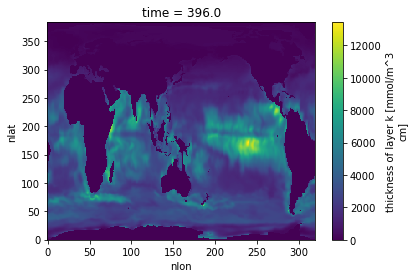

In [10]:
dso.zoo3C_150m.isel(time=0).plot();

### Fix the nans in depth integrated variables

In [11]:
grid = pop_tools.get_grid('POP_gx1v6')
dso = dso.where(grid.REGION_MASK>0)

/glade/work/kristenk/miniconda/envs/analysis4/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


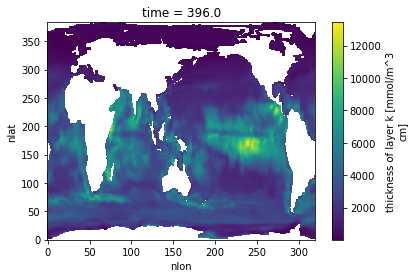

In [12]:
dso.zoo3C_150m.isel(time=0).plot();

## Compute properties at model bottom

In [13]:
KMT = dsets[varnames[0]].KMT.compute()
KMT

<xarray.DataArray 'KMT' (nlat: 384, nlon: 320)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [38., 38., 38., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:    k Index of Deepest Grid Cell on T Grid
    coordinates:  TLONG TLAT

In [14]:
%%time
def field_at_bottom(da):
    """return a field indexed at the model's bottom layer"""

    tmp_bot = xr.DataArray(np.ones(da[:, 0, :, :].shape) * np.nan, 
                           dims=tuple(da.dims[i] for i in [0, 2, 3]),
                           coords={c: da.coords[c] for c in ['time']},
                          )

    assert KMT.shape == da.shape[-2:]
    
    for j in range(len(da.nlat)):
        for i in range(len(da.nlon)):
            if KMT[j, i] > 0:
                k = int(KMT[j, i] - 1)
                tmp_bot.values[:, j, i] = da[:, k, j, i]
    return tmp_bot

for v in ['TEMP', 'POC_FLUX_IN',]:
    template = dsets[v][v][:, 0, :, :].drop('z_t') 
    dso[f'{v}_bottom'] = xr.map_blocks(
        field_at_bottom, dsets[v][v], 
        template=template
    ).compute()

dso.info()    

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	time = 732 ;

variables:
	float64 TLONG(nlat, nlon) ;
		TLONG:long_name = array of t-grid longitudes ;
		TLONG:units = degrees_east ;
	float64 TLAT(nlat, nlon) ;
		TLAT:long_name = array of t-grid latitudes ;
		TLAT:units = degrees_north ;
	float64 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT ;
	float64 TAREA(nlat, nlon) ;
		TAREA:long_name = area of T cells ;
		TAREA:units = centimeter^2 ;
		TAREA:coordinates = TLONG TLAT ;
	float32 TEMP_150m(time, nlat, nlon) ;
		TEMP_150m:long_name = Potential Temperature ;
		TEMP_150m:units = degC ;
		TEMP_150m:coordinates = TLONG TLAT z_t  ;
		TEMP_150m:grid_loc = 3111 ;
		TEMP_150m:cell_methods = time: mean ;
	float32 zoo3C_150m(time, nlat, nlon) ;
		zoo3C_150m:long_name = thickness of layer k ;
		zoo3C_150m:units = mmol/m^3 cm ;
	float32 zoo4C_150m(time, nlat, nlon) ;
		zoo4C_150m:long_name = thickness of layer k ;
		zoo4C_150

Check output

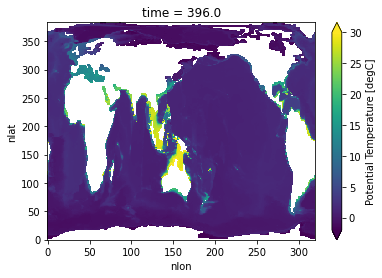

In [15]:
dso.TEMP_bottom.isel(time=0).plot(vmin=-2, vmax=30.)

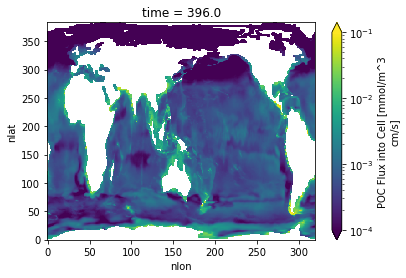

In [16]:
dso.POC_FLUX_IN_bottom.isel(time=0).plot(norm=colors.LogNorm(vmin=1e-4, vmax=0.1))

## Write output file

In [17]:
%%time
dso.to_netcdf(f'{dout}/{case}.FIESTY-forcing.nc', mode='w')

CPU times: user 13.6 s, sys: 2.19 s, total: 15.8 s
Wall time: 22.9 s


In [18]:
f'{dout}/{case}.FIESTY-forcing.nc'

'/glade/work/kristenk/fish-offline/g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004.FIESTY-forcing.nc'